In [1]:
import numpy as np

images = np.load("data/radio-galaxies.npy").astype(np.float32)
np.random.shuffle(images)

images = np.squeeze(images)

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

shape:      (4284, 130, 130)
min value:  0.0
max value:  1.0


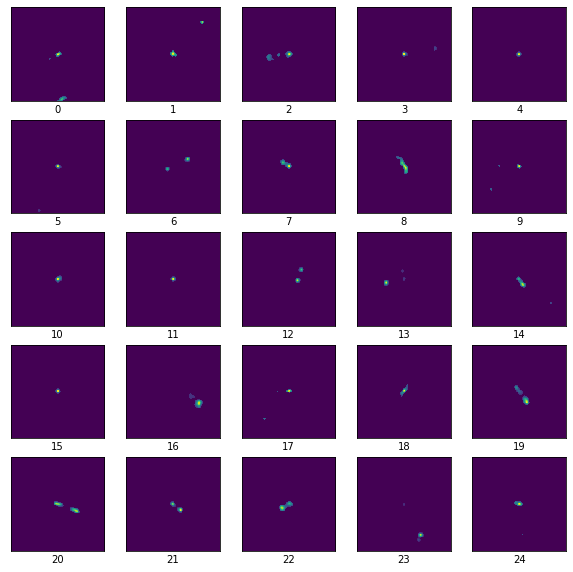

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(i)

In [3]:
import math
import pink

som_dim = 10
neuron_dim = int(images.shape[1] / math.sqrt(2.0) * 2.0)

np_som = np.zeros((som_dim, som_dim, neuron_dim, neuron_dim)).astype(np.float32)
som = pink.SOM(np_som)

data = [pink.Data(images[i]) for i in range(len(images))]

trainer = pink.Trainer(som, pink.GaussianFunctor(1.1, 0.2))

In [4]:
from tqdm import tqdm_notebook

for iter in tqdm_notebook(range(1), desc="epoch"):
    for i in tqdm_notebook(range(len(images)), desc="train", leave=False):
        trainer(data[i])

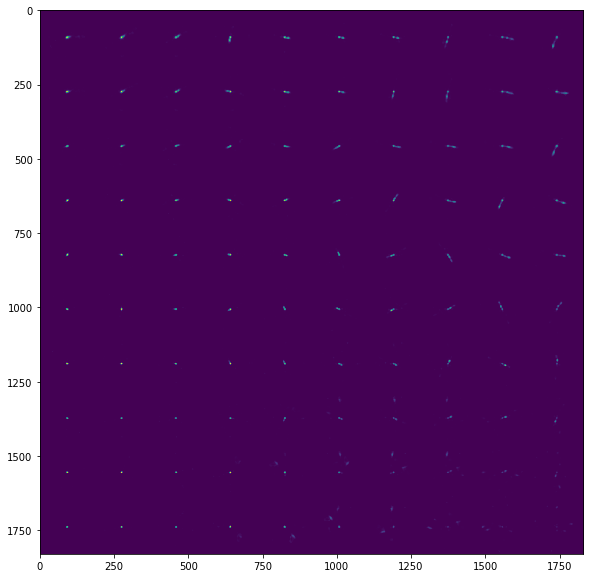

In [5]:
trainer.update_som()
np_som = np.array(som, copy=True)

plt.figure(figsize=(10,10))
plt.imshow(np_som.swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)